<a href="https://colab.research.google.com/github/bryanvilcamarchand/Hotel-Reservation-Prediction/blob/master/Hotel_Reservation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hotel Reservation Prediction

## Context

Nowadays, all the facilities that hotels offer to their guests in the booking  process 🛎️ result in a reduction of the closure rate. The most common reasons for booking cancellations are no penalties it, many similar offers, bad reviews by others customers in the public web, change of plan, etc.

Thhe goald of this project is create a model to predict that customers with high probabilite to confirm booking 🚀

<img src='https://quaysidehotel.co.uk/wp-content/uploads/2022/09/Reasons-to-a-room-direct-with-hotel-over-booking-via-third-party-travel-agency-1024x657.jpg' width="500" height="300">

The feature set includes:

- Booking_ID: Unique identifier of each booking.
- no_of_adults: Number of adults.
- no_of_children: Number of children.
- no_of_weekend_nights: Number of weekend nights - Saturday or Sunday.
- no_of_week_nights: Number of week nights - Monday to Friday.
- type_of_meal_plane: Type of meal plan booked by the customer.
- required_car_parking_space: Does the customer require a car parking space? - 0: No, 1: Yes.
- room_type_reserved: Type of room reserved by the customer.
- lead_time: Number of days between the date of booking and the arrival date.
- arrival_year: Year of arrival date.
-arrival_month: Month of arrival date.
- arrival_date: Date of the month.
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? - 0: No, 1: Yes.
- no_of_previous_cancellations: Number of previous bookings that were canceled - by the customer prior to the current booking.
- no_of_previous_bookings_not_canceled: Number of previous bookings not - canceled by the customer prior to the current booking.
- avg_price_per_room: Average price per day of the reservation, in euros; prices of the rooms are dynamic.
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc).
- booking_status: Flag indicating if the booking was canceled or not.

In [2]:
#Import libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PROYECTOS PYTHON/Hotel Reservation Prediction/Hotel Reservations.csv')

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# Review data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Validate null values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
# Descriptive analysis
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
# EDA tiem
df.groupby(['arrival_year','arrival_month']).size().reset_index(name='count')


,arrival_year,arrival_month,count
0,2017,7,363
1,2017,8,1014
2,2017,9,1649
3,2017,10,1913
4,2017,11,647
5,2017,12,928
6,2018,1,1014
7,2018,2,1704
8,2018,3,2358
9,2018,4,2736


In [9]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
# Target
df["booking_status"].value_counts(normalize = True) * 100 # Not canceled 67%, Canceled 33%

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

In [11]:
df["no_of_children"].value_counts(normalize = True) * 100  # 92% times the booking doesn't have children

0     92.562371
1      4.460372
2      2.916609
3      0.052378
9      0.005513
10     0.002757
Name: no_of_children, dtype: float64

In [12]:
# Filter outliers
df = df[df['no_of_children'] < 9]

In [13]:
df["no_of_weekend_nights"].value_counts(normalize = True) * 100 # 46% times the booking is not in the weekend.

0    46.512461
1    27.555690
2    25.002757
3     0.421813
4     0.355646
5     0.093736
6     0.055139
7     0.002757
Name: no_of_weekend_nights, dtype: float64

In [14]:
df["no_of_week_nights"].value_counts(normalize = True) * 100 # 80% times the booking have only 3 days of week from Monday to Friday.

2     31.547750
1     26.155161
3     21.611712
4      8.243273
0      6.580834
5      4.446956
6      0.521063
7      0.311535
10     0.170931
8      0.170931
9      0.093736
11     0.046868
15     0.027569
12     0.024813
14     0.019299
13     0.013785
17     0.008271
16     0.005514
Name: no_of_week_nights, dtype: float64

In [15]:
df["type_of_meal_plan"].value_counts(normalize = True) * 100 # 86% customer pay for a meal plan.

Meal Plan 1     76.731363
Not Selected    14.143141
Meal Plan 2      9.111712
Meal Plan 3      0.013785
Name: type_of_meal_plan, dtype: float64

In [16]:
df["required_car_parking_space"].value_counts(normalize = True) * 100 # Almost all customer doesn't need car parking

0    96.901191
1     3.098809
Name: required_car_parking_space, dtype: float64

In [17]:
df["room_type_reserved"].value_counts(normalize = True) * 100 # The most popular room type are room type 1 and room type 4.

Room_Type 1    77.550176
Room_Type 4    16.696074
Room_Type 6     2.663211
Room_Type 2     1.905051
Room_Type 5     0.730591
Room_Type 7     0.435598
Room_Type 3     0.019299
Name: room_type_reserved, dtype: float64

<Axes: xlabel='lead_time', ylabel='Count'>

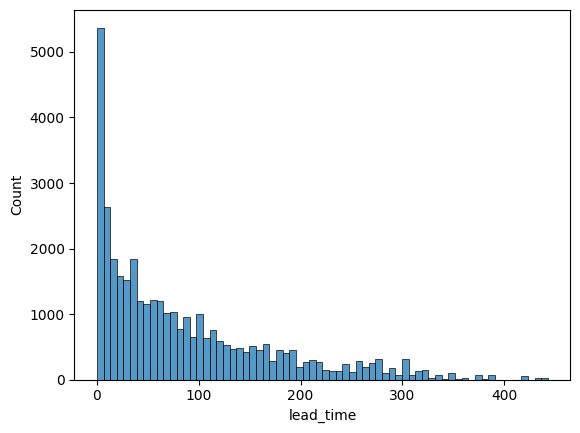

In [18]:
sns.histplot(data = df, x = "lead_time") # Many people book and arrive at the hotel in less than 90 days (3 months).

In [19]:
df["arrival_year"].value_counts(normalize = True) * 100

2018    82.046758
2017    17.953242
Name: arrival_year, dtype: float64

In [20]:
df["arrival_month"].value_counts(normalize = True) * 100 # There isn't a speciall day of month to book

10    14.655933
9     12.712285
8     10.509484
6      8.830503
12     8.328738
11     8.215704
7      8.050287
4      7.543008
5      7.162550
3      6.500882
2      4.697839
1      2.792788
Name: arrival_month, dtype: float64

In [21]:
df["market_segment_type"].value_counts(normalize = True) * 100 # The most popular channel to book is Online (63%).

Online           63.994266
Offline          29.025143
Corporate         5.558006
Complementary     1.077966
Aviation          0.344618
Name: market_segment_type, dtype: float64

In [22]:
df["repeated_guest"].value_counts(normalize = True) * 100 # Almost all customers visit the hotel for the first time.

0    97.436039
1     2.563961
Name: repeated_guest, dtype: float64

In [23]:
df["no_of_previous_cancellations"].value_counts(normalize = True) * 100 # Almost all customers visit the hotel for the first time.

0     99.068152
1      0.545876
2      0.126820
3      0.118549
11     0.068924
5      0.030326
4      0.027569
13     0.011028
6      0.002757
Name: no_of_previous_cancellations, dtype: float64

In [24]:
df["no_of_previous_bookings_not_canceled"].value_counts(normalize = True) * 100 # Almost all customers visit the hotel for the first time.

0     97.761359
1      0.628584
2      0.308778
3      0.220556
4      0.179202
5      0.165417
6      0.099250
7      0.066167
8      0.063410
10     0.052382
9      0.052382
11     0.041354
12     0.033083
14     0.024813
15     0.022056
16     0.019299
13     0.019299
18     0.016542
20     0.016542
21     0.016542
17     0.016542
19     0.016542
22     0.016542
25     0.008271
27     0.008271
24     0.008271
23     0.008271
44     0.005514
29     0.005514
48     0.005514
28     0.005514
30     0.005514
32     0.005514
31     0.005514
26     0.005514
46     0.002757
55     0.002757
45     0.002757
57     0.002757
53     0.002757
54     0.002757
58     0.002757
41     0.002757
40     0.002757
43     0.002757
35     0.002757
50     0.002757
56     0.002757
33     0.002757
37     0.002757
42     0.002757
51     0.002757
38     0.002757
34     0.002757
39     0.002757
52     0.002757
49     0.002757
47     0.002757
36     0.002757
Name: no_of_previous_bookings_not_canceled, dtype: float

<Axes: xlabel='avg_price_per_room'>

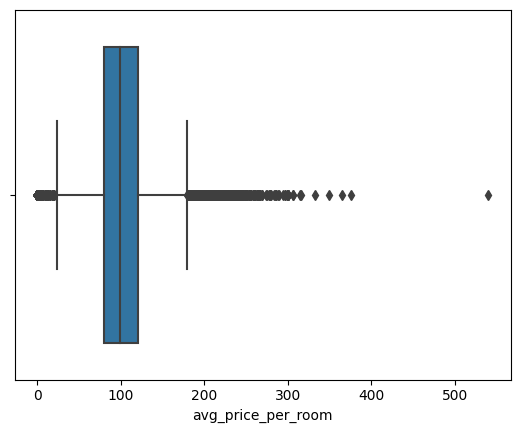

In [25]:
sns.boxplot(data = df, x = "avg_price_per_room") # Most of the prices paid were around 100 dollars. There are high and low outliers values.

In [26]:
df["no_of_special_requests"].value_counts(normalize = True) * 100 # 50% times the customers needs speciall something

0    54.521394
1    31.349250
2    12.031319
3     1.860940
4     0.215042
5     0.022056
Name: no_of_special_requests, dtype: float64

- Not canceled 67%, Canceled 33%. We must apply data balancing for the target variable.
- 72% times the booking is for 2 persons.
- 92% times the booking doesn't have children.
- 46% times the booking is not in the weekend.
- 80% times the booking have only 3 days of week from Monday to Friday.
- 86% customer pay for a meal plan.
- Almost all customer doesn't need car parking.
- The most popular room type are room type 1 and room type 4.
- Many people book and arrive at the hotel in less than 90 days (3 months).
- There isn't a speciall day of month to book.
- The most popular channel to book is Online (63%).
- Almost all customers visit the hotel for the first time.
- Most of the prices paid were around 100 dollars. There are high and low outliers values.
- 50% times the customers needs speciall something


## Feature Engineering

In [27]:
# Tranform target
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [28]:
#Droop Booking ID
df.drop("Booking_ID",inplace = True, axis = 1) #eliminamos la variable tenencia

In [29]:
#define target
label = df["booking_status"]

<ipython-input-30-a733c39c49a0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")


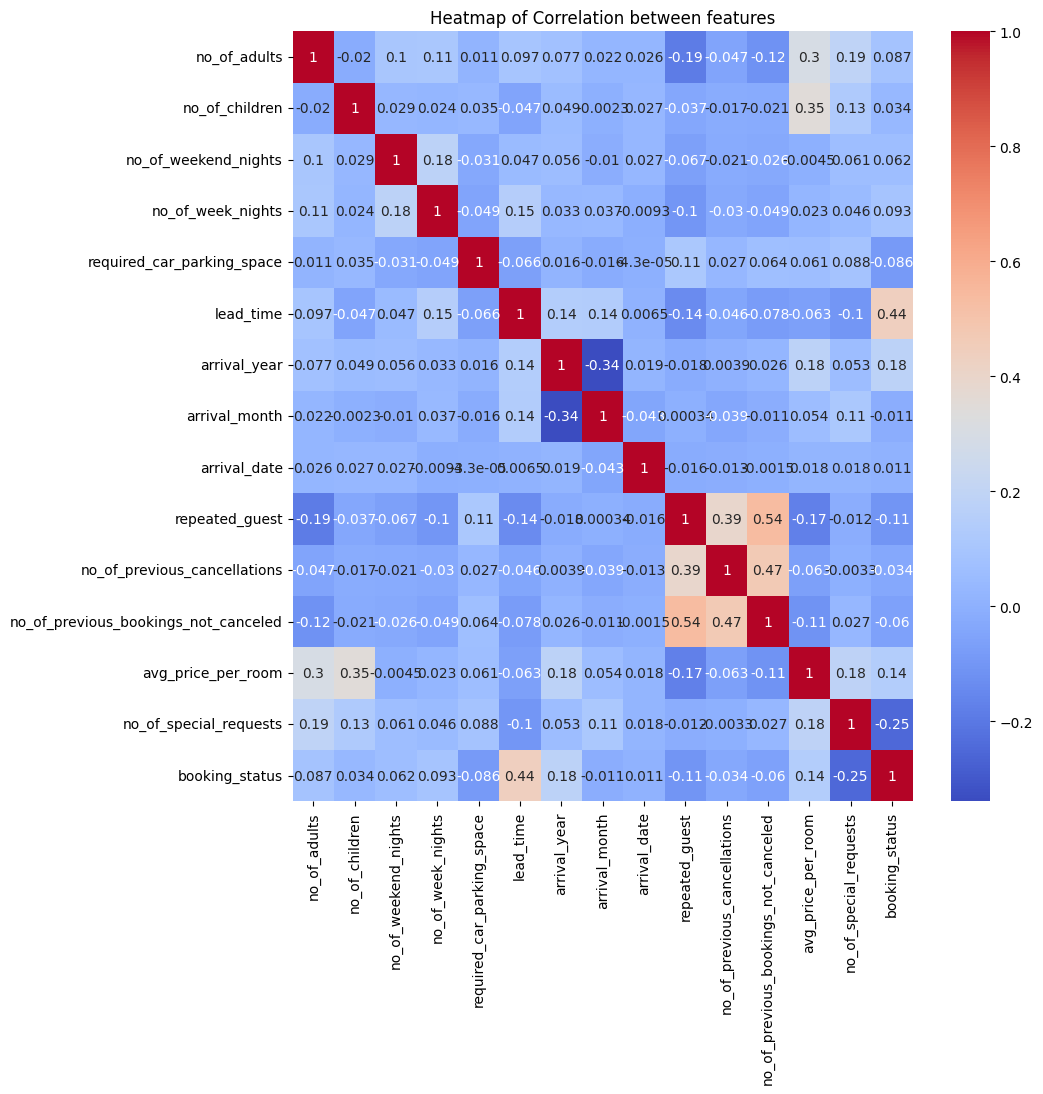

In [30]:
# Analyze correlation woth all features
plt.figure(figsize = (10, 10))
plt.title("Heatmap of Correlation between features")
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

- There is a high correlation between no_of_previous_bookings_not_canceled and repeated_guest.
- There is a high correlation between no_of_previous_bookings_not_canceled and no_of_previous_cancellations
- There is a high correlation between no_of_previous_cancellations and repeated_guest

In [31]:
df.drop("no_of_previous_cancellations",inplace = True, axis = 1) #eliminamos la variable tenencia
df.drop("no_of_previous_bookings_not_canceled",inplace = True, axis = 1) #eliminamos la variable tenencia

<ipython-input-32-a733c39c49a0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")


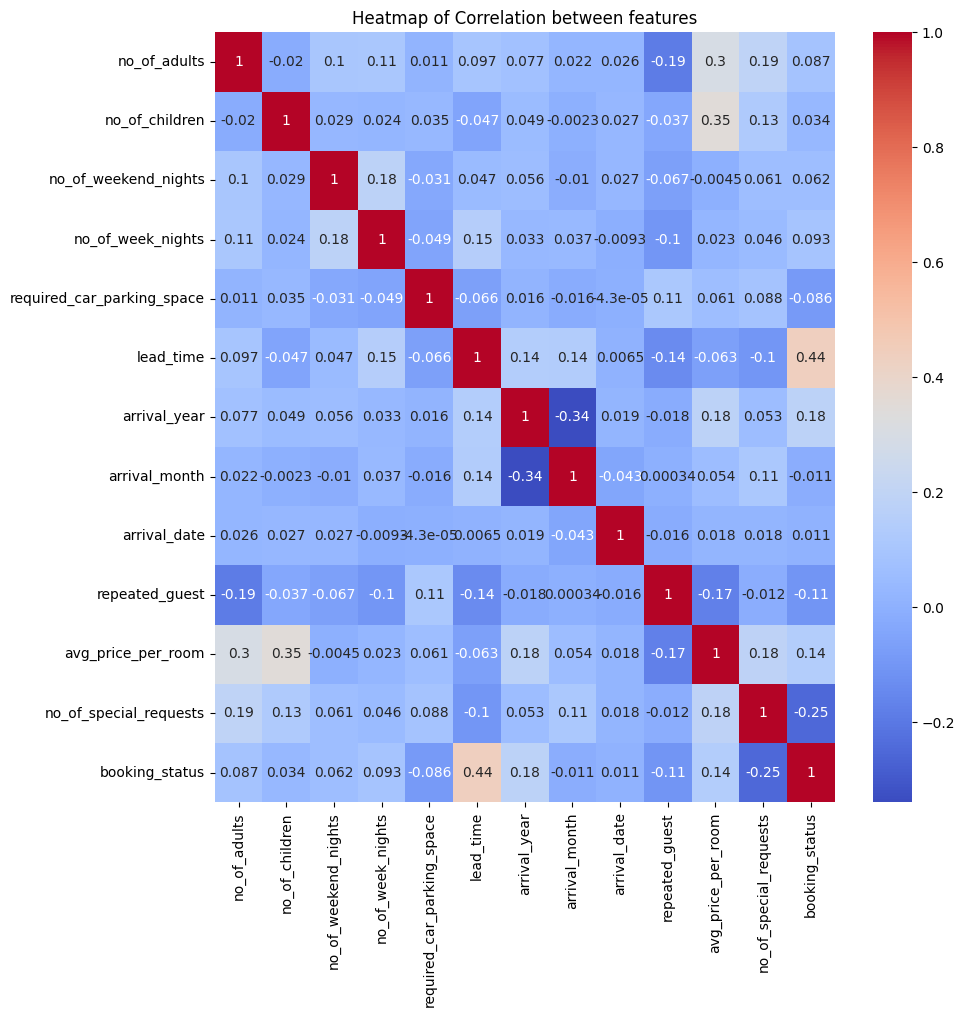

In [32]:
# Analyze correlation woth all features
plt.figure(figsize = (10, 10))
plt.title("Heatmap of Correlation between features")
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36272 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_adults                36272 non-null  int64  
 1   no_of_children              36272 non-null  int64  
 2   no_of_weekend_nights        36272 non-null  int64  
 3   no_of_week_nights           36272 non-null  int64  
 4   type_of_meal_plan           36272 non-null  object 
 5   required_car_parking_space  36272 non-null  int64  
 6   room_type_reserved          36272 non-null  object 
 7   lead_time                   36272 non-null  int64  
 8   arrival_year                36272 non-null  int64  
 9   arrival_month               36272 non-null  int64  
 10  arrival_date                36272 non-null  int64  
 11  market_segment_type         36272 non-null  object 
 12  repeated_guest              36272 non-null  int64  
 13  avg_price_per_room          362

In [34]:
# Get dummies for categorical features
df2 = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], prefix=['meal', 'room', 'market'])

In [35]:
df2.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_Meal Plan 1', 'meal_Meal Plan 2', 'meal_Meal Plan 3',
       'meal_Not Selected', 'room_Room_Type 1', 'room_Room_Type 2',
       'room_Room_Type 3', 'room_Room_Type 4', 'room_Room_Type 5',
       'room_Room_Type 6', 'room_Room_Type 7', 'market_Aviation',
       'market_Complementary', 'market_Corporate', 'market_Offline',
       'market_Online'],
      dtype='object')

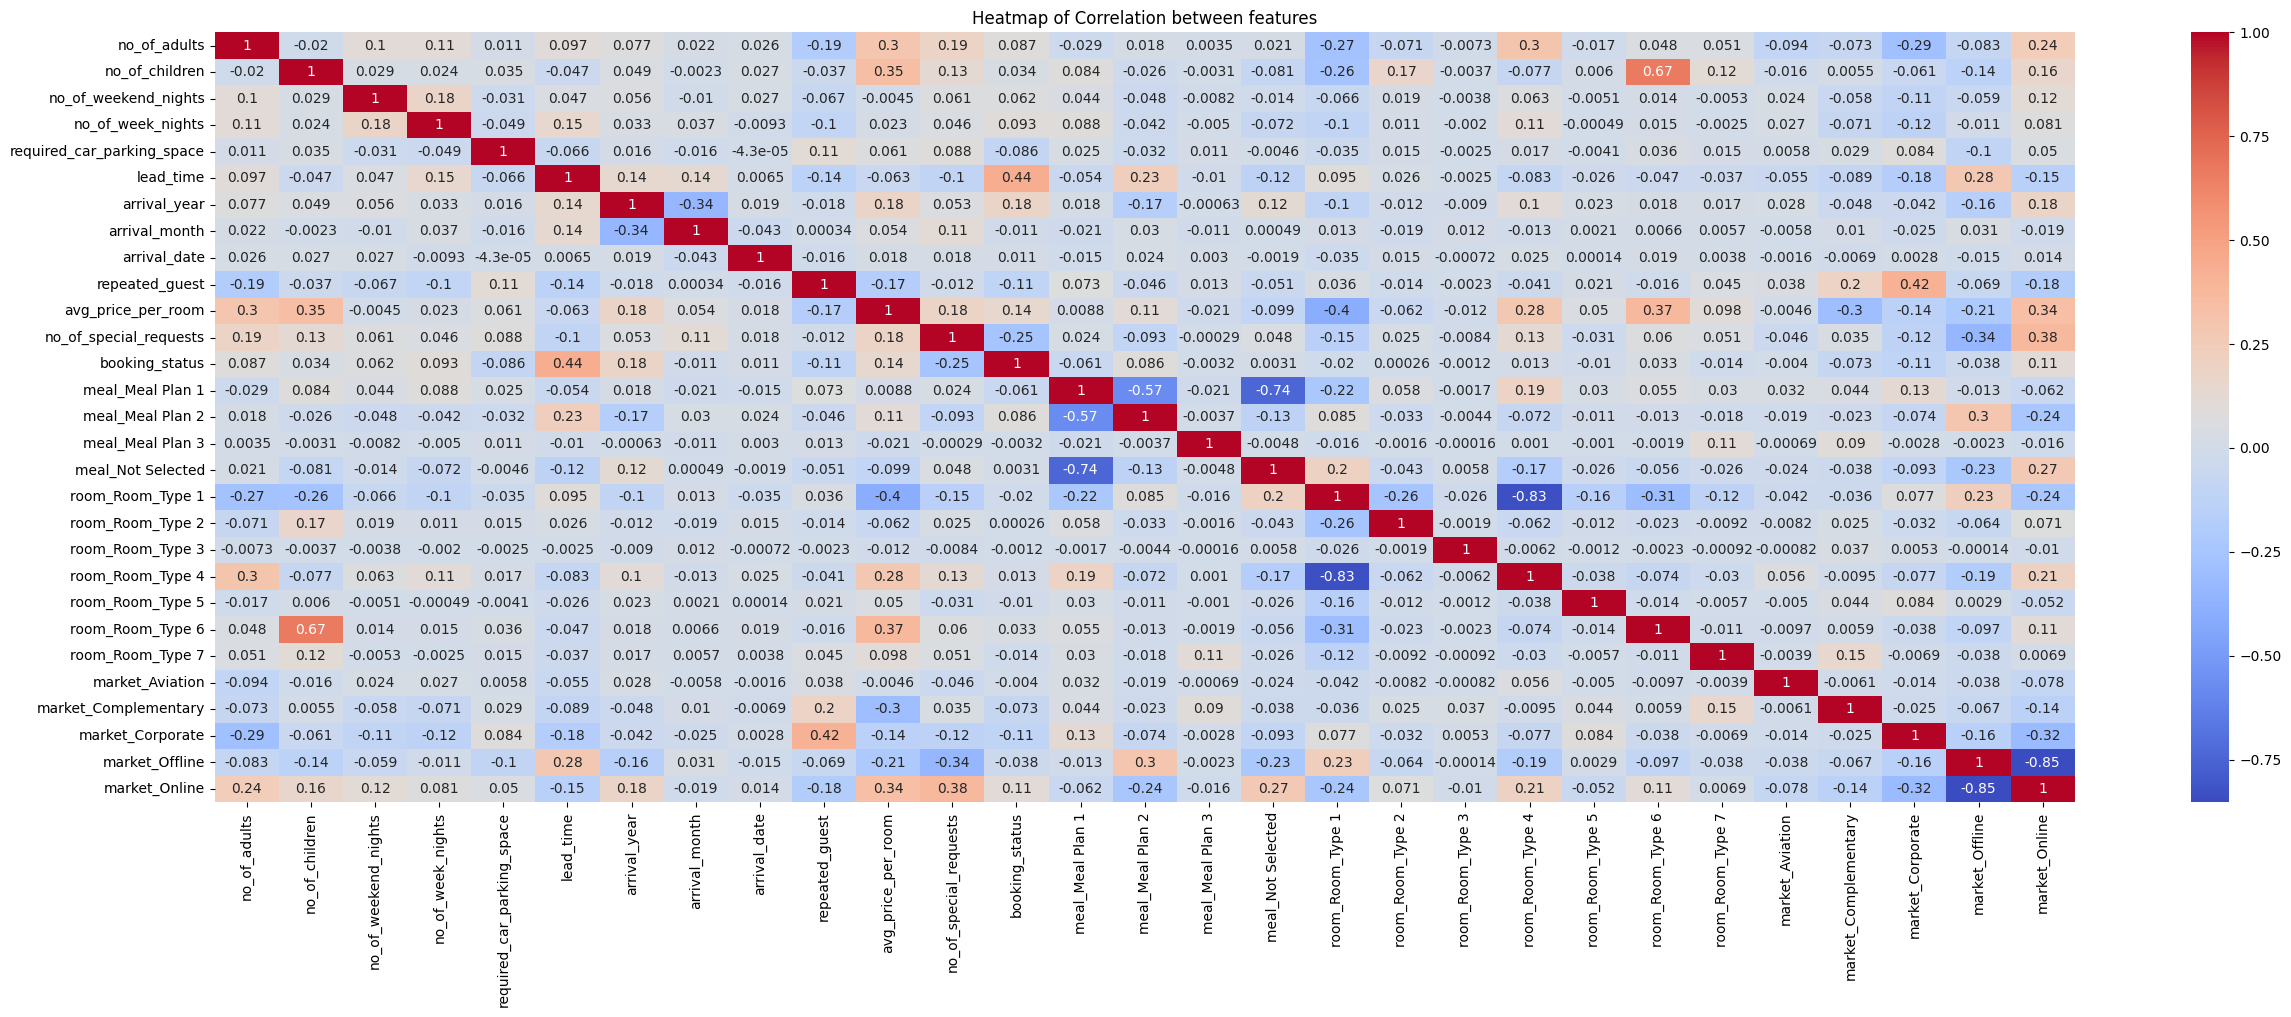

In [36]:
# Analyze correlation woth all features
plt.figure(figsize = (30, 10))
plt.title("Heatmap of Correlation between features")
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [37]:
df2.drop("booking_status", inplace=True, axis=1)

In [38]:
# drop features with high correlation
df2.drop('meal_Meal Plan 1',inplace = True, axis = 1) #eliminamos la variable tenencia
df2.drop('meal_Meal Plan 2',inplace = True, axis = 1) #eliminamos la variable tenencia
df2.drop("room_Room_Type 1",inplace = True, axis = 1) #eliminamos la variable tenencia
df2.drop("room_Room_Type 4",inplace = True, axis = 1) #eliminamos la variable tenencia
df2.drop("room_Room_Type 6",inplace = True, axis = 1) #eliminamos la variable tenencia
df2.drop("market_Corporate",inplace = True, axis = 1) #eliminamos la variable tenencia
df2.drop("market_Offline",inplace = True, axis = 1) #eliminamos la variable tenencia

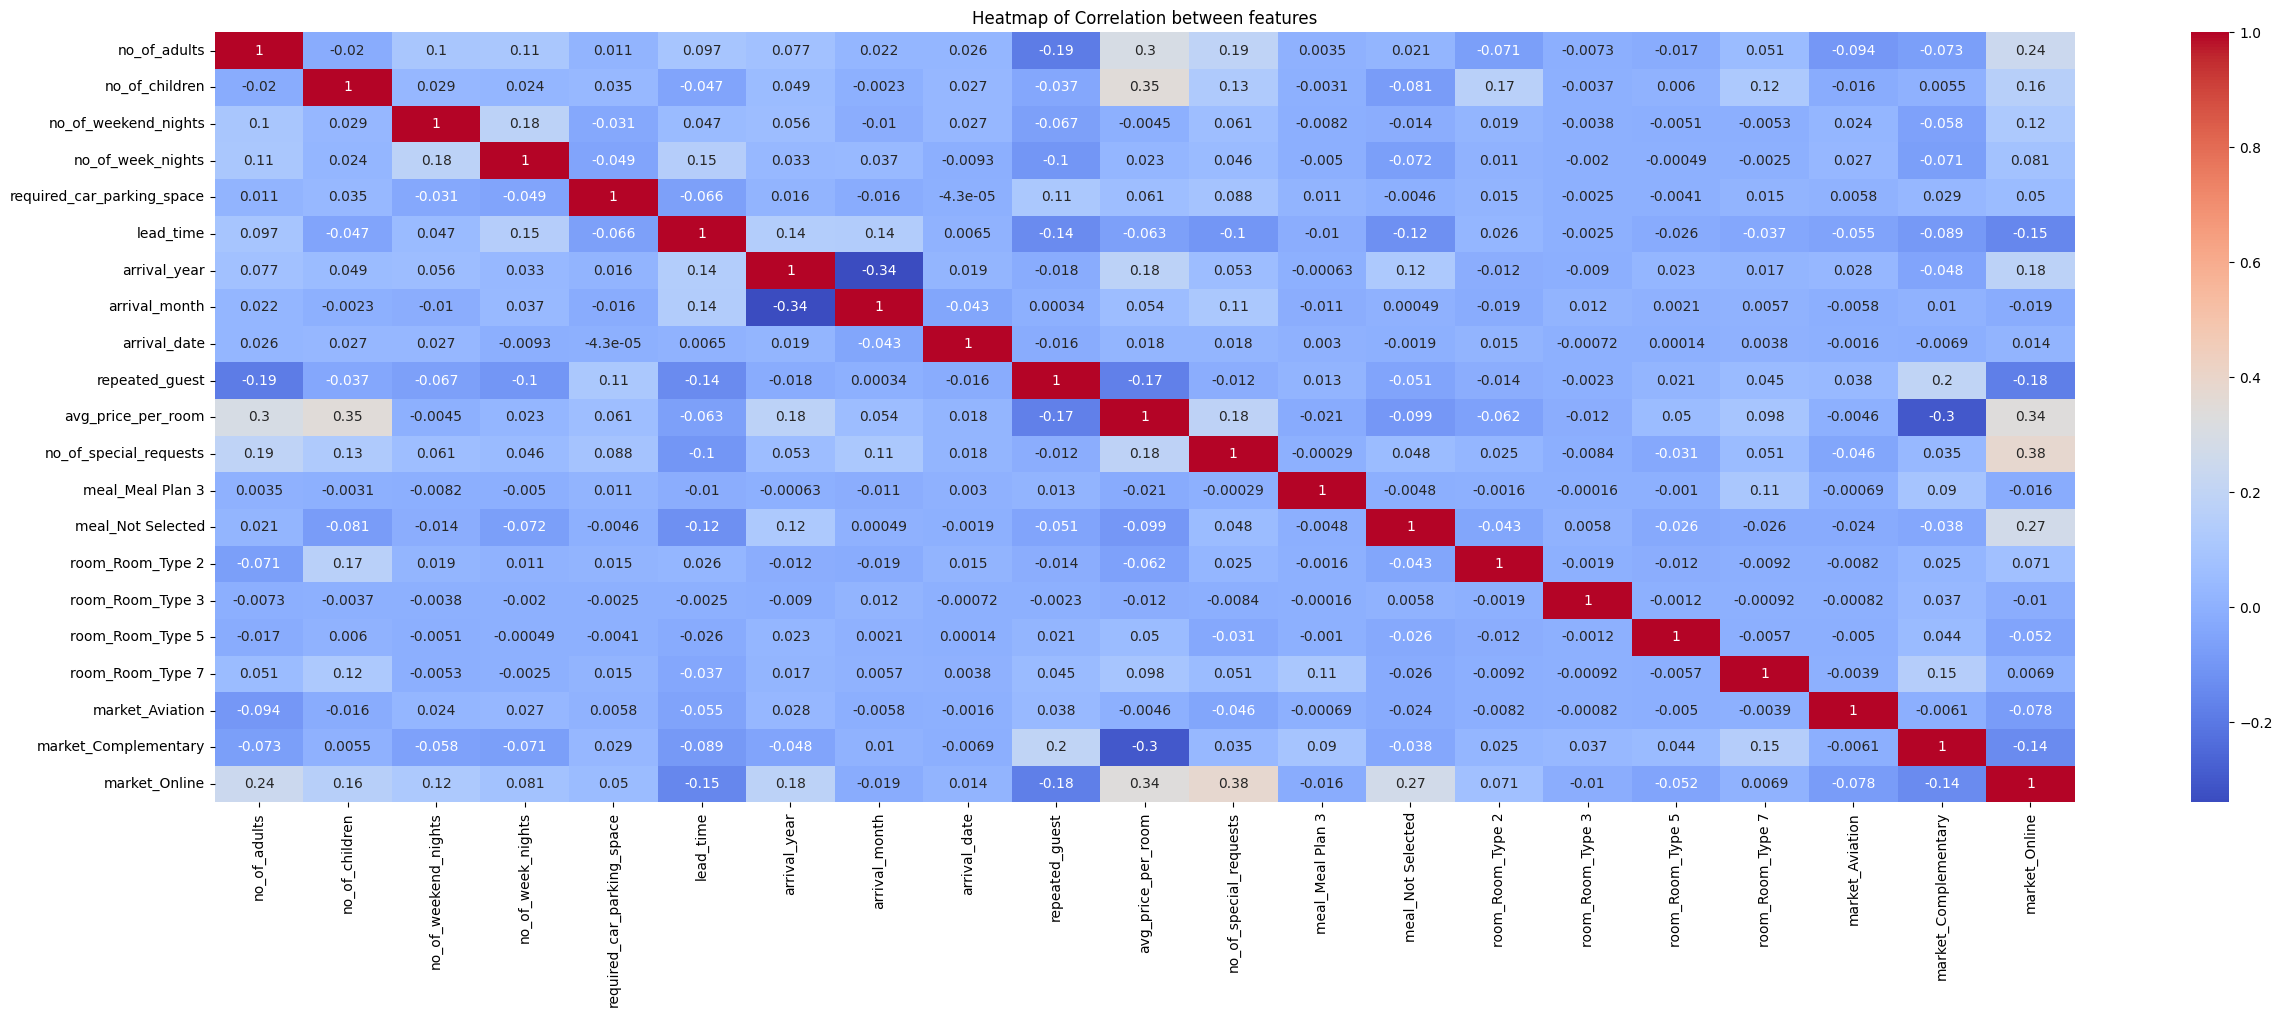

In [39]:
# Analyze correlation woth all features
plt.figure(figsize = (30, 10))
plt.title("Heatmap of Correlation between features")
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")
plt.show()

# Selection best features


In [40]:
# Selection best features
k_best = SelectKBest(score_func=f_classif, k=10)
X = k_best.fit_transform(df2, label)
y = label

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(df2.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

lead_time: 8637.99
no_of_special_requests: 2482.66
arrival_year: 1209.09
avg_price_per_room: 752.77
repeated_guest: 422.38
market_Online: 414.76
no_of_week_nights: 315.81
no_of_adults: 275.92
required_car_parking_space: 271.45
market_Complementary: 193.62


In [41]:
df_final = df2[['lead_time', 'no_of_special_requests', 'arrival_year', 'avg_price_per_room', 'repeated_guest', 'market_Online', 'no_of_week_nights', 'no_of_adults', 'required_car_parking_space', 'market_Complementary']]


In [42]:
df_final.head()

,lead_time,no_of_special_requests,arrival_year,avg_price_per_room,repeated_guest,market_Online,no_of_week_nights,no_of_adults,required_car_parking_space,market_Complementary
0,224,0,2017,65.00,0,0,2,2,0,0
1,5,1,2018,106.68,0,1,3,2,0,0
2,1,0,2018,60.00,0,1,1,1,0,0
3,211,0,2018,100.00,0,1,2,2,0,0
4,48,0,2018,94.50,0,1,1,2,0,0


## Evaluate models

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, label, test_size = 0.3)

We will apply the following models:
- Decision trees
- Logistic regression
- XGBoost
- Random forest

In [44]:
def apply_confusion(model,xTrain,xTest,yTrain,yTest):

    model.fit(xTrain, yTrain) #Train model
    predictions = model.predict(xTest) #Validation with test data
    conf_mtx = confusion_matrix(yTest,predictions) #Confusion matrix
    y_pred_probs = model.predict_proba(xTest)[:, 1]

    f, ax = plt.subplots(figsize=(5,3))

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix Test');
    ax.xaxis.set_ticklabels(['Not Churn', 'Churn']);
    ax.yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print(classification_report(yTest,predictions))

    roc_auc = roc_auc_score(yTest,predictions) #auc
    print ("AUC ROC : ",roc_auc) #show results

    # Mostrar el gráfico
    plt.show()

In [45]:
def apply_curva_roc(model,xTrain,xTest,yTrain,yTest):

    model.fit(xTrain, yTrain) #Train model
    predictions = model.predict(xTest) #Validation with test data
    conf_mtx = confusion_matrix(yTest,predictions) #Confusion matrix
    y_pred_probs = model.predict_proba(xTest)[:, 1]

    roc_auc = roc_auc_score(yTest,predictions) #auc
    print ("AUC ROC : ",roc_auc) #show results

    fpr, tpr, thresholds = roc_curve(yTest, y_pred_probs) #ROC curve
    #fpr : false positive rate
    #tpr : true positive rate
    plt.plot([0, 1], [0, 1])
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()

### Decision tree model

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7291
           1       0.78      0.76      0.77      3591

    accuracy                           0.85     10882
   macro avg       0.83      0.83      0.83     10882
weighted avg       0.85      0.85      0.85     10882

AUC ROC :  0.82833871508806


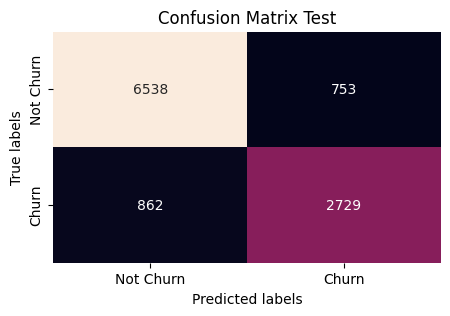

AUC ROC :  0.8295336781429946


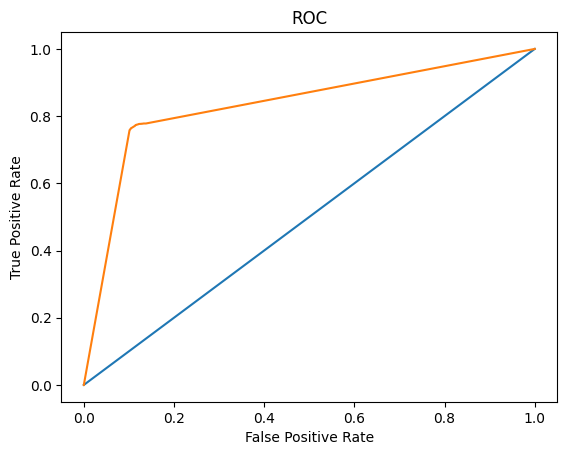

In [46]:
decision_tree = DecisionTreeClassifier() # define model
apply_confusion(decision_tree,X_train, X_test, y_train, y_test)
apply_curva_roc(decision_tree,X_train, X_test, y_train, y_test)

### Logistic regression model

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      7291
           1       0.74      0.59      0.65      3591

    accuracy                           0.79     10882
   macro avg       0.78      0.74      0.75     10882
weighted avg       0.79      0.79      0.79     10882

AUC ROC :  0.7426435570326019


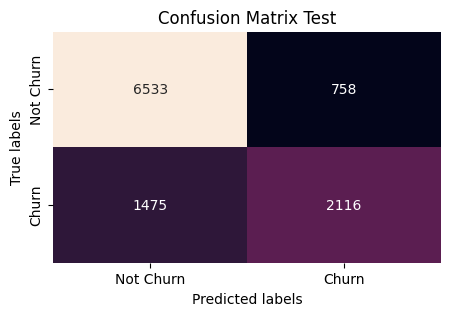

AUC ROC :  0.7426435570326019


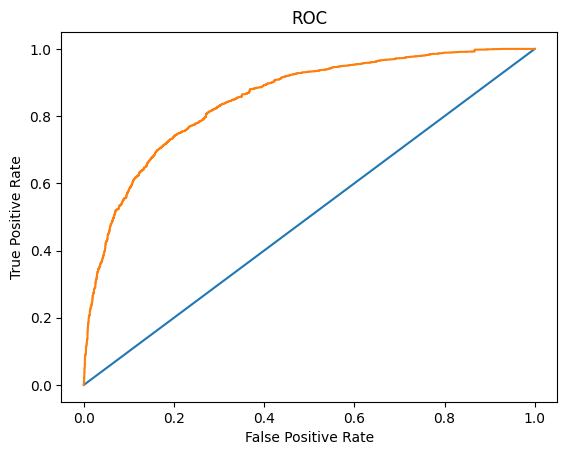

In [47]:
logistic_reg = LogisticRegression()
apply_confusion(logistic_reg,X_train, X_test, y_train, y_test)
apply_curva_roc(logistic_reg,X_train, X_test, y_train, y_test)

### Random forest model

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7291
           1       0.85      0.78      0.81      3591

    accuracy                           0.88     10882
   macro avg       0.87      0.85      0.86     10882
weighted avg       0.88      0.88      0.88     10882

AUC ROC :  0.8540430916973013


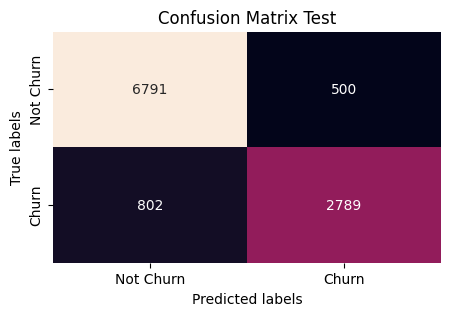

AUC ROC :  0.8519649448985545


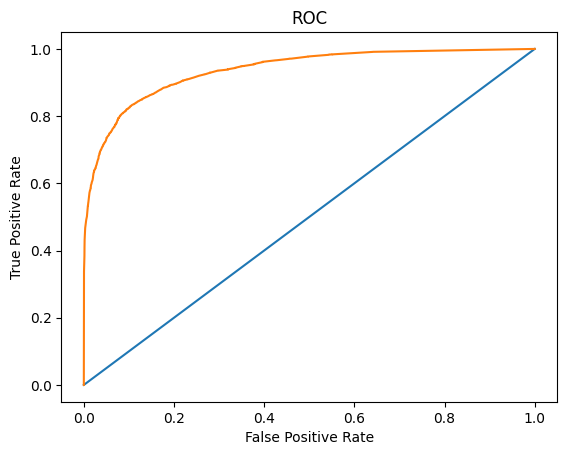

In [48]:
random_forest = RandomForestClassifier()
apply_confusion(random_forest,X_train, X_test, y_train, y_test)
apply_curva_roc(random_forest,X_train, X_test, y_train, y_test)

## XGBoost model

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7291
           1       0.84      0.76      0.80      3591

    accuracy                           0.87     10882
   macro avg       0.86      0.84      0.85     10882
weighted avg       0.87      0.87      0.87     10882

AUC ROC :  0.8434756522052324


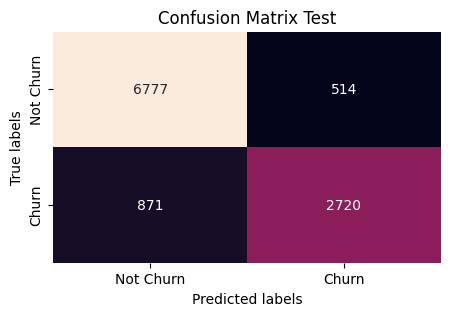

AUC ROC :  0.8434756522052324


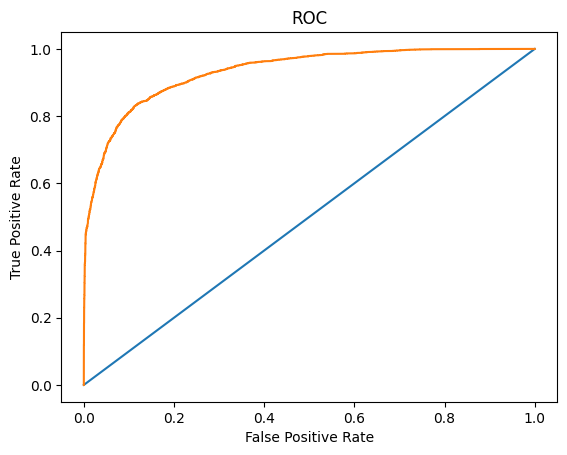

In [49]:
xg_boost = XGBClassifier()
apply_confusion(xg_boost,X_train, X_test, y_train, y_test)
apply_curva_roc(xg_boost,X_train, X_test, y_train, y_test)

## Oversampling

### We will try to improve our results by applying oversampling of data

In [50]:
df_original = pd.concat([df2, label], axis=1)

In [51]:
from sklearn.utils import resample

upsample_data = df_original # Generate a copy of a original dataset

majority = upsample_data[upsample_data["booking_status"]==0] # Show category not booking cancelled
minority = upsample_data[upsample_data["booking_status"]==1] # Show category booking cancelled

In [52]:
majority.shape, minority.shape #shape of each category

((24388, 22), (11884, 22))

In [53]:
minority_upsampled = resample(minority, replace=True, n_samples=24390,random_state=1) # Oversampling

In [54]:
minority_upsampled.shape

(24390, 22)

In [55]:
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

In [56]:
upsample_data["booking_status"].value_counts() #Check the same size of each category of the target.

1    24390
0    24388
Name: booking_status, dtype: int64

In [57]:
label_upsample = upsample_data["booking_status"]
upsample_data.drop("booking_status",inplace = True, axis = 1)

In [58]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)


## Decision tree model

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7297
           1       0.90      0.94      0.92      7337

    accuracy                           0.92     14634
   macro avg       0.92      0.92      0.92     14634
weighted avg       0.92      0.92      0.92     14634

AUC ROC :  0.9193657902133938


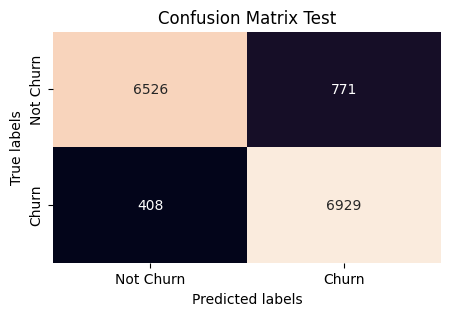

AUC ROC :  0.9210046981691856


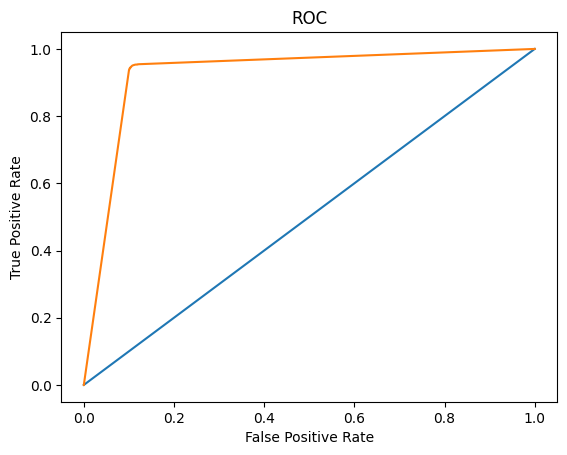

In [59]:
decision_tree_ups = DecisionTreeClassifier()
apply_confusion(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)
apply_curva_roc(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

## Logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      0.80      0.77      7297
           1       0.79      0.73      0.76      7337

    accuracy                           0.77     14634
   macro avg       0.77      0.77      0.77     14634
weighted avg       0.77      0.77      0.77     14634

AUC ROC :  0.7660433397239861


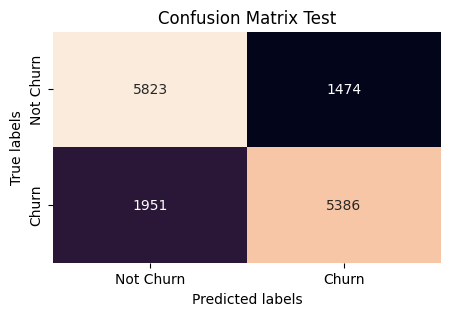

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC ROC :  0.7660433397239861


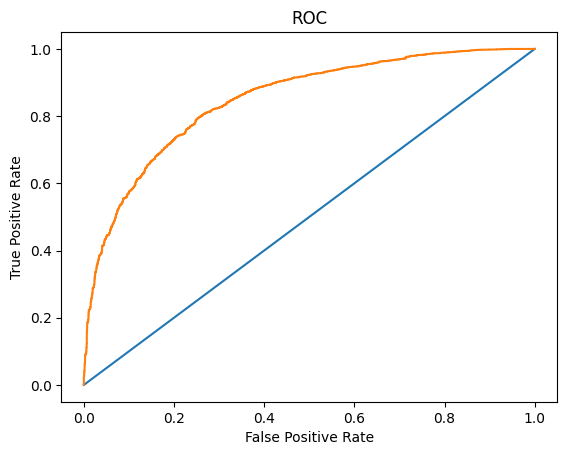

In [60]:
logistic_reg = LogisticRegression(random_state = 42)
apply_confusion(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)
apply_curva_roc(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

## Random forest

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7297
           1       0.93      0.95      0.94      7337

    accuracy                           0.94     14634
   macro avg       0.94      0.94      0.94     14634
weighted avg       0.94      0.94      0.94     14634

AUC ROC :  0.9410653787063636


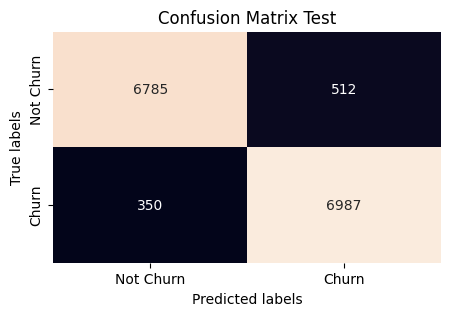

AUC ROC :  0.9418161245912232


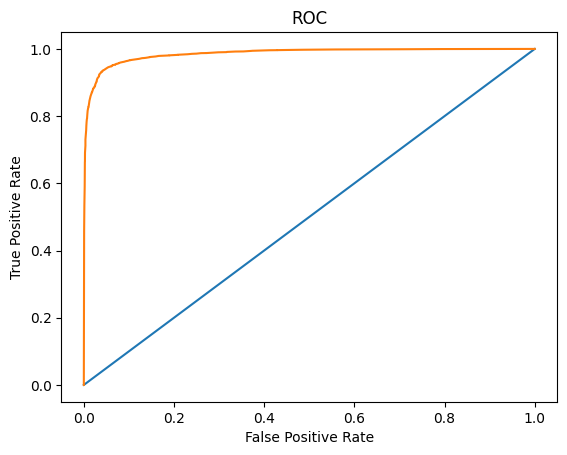

In [61]:
random_forest = RandomForestClassifier()
apply_confusion(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)
apply_curva_roc(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

## XGboost

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7297
           1       0.90      0.90      0.90      7337

    accuracy                           0.90     14634
   macro avg       0.90      0.90      0.90     14634
weighted avg       0.90      0.90      0.90     14634

AUC ROC :  0.8966752063190002


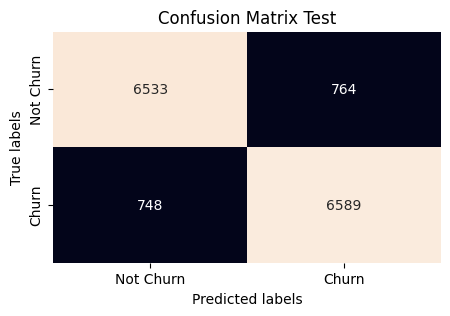

AUC ROC :  0.8966752063190002


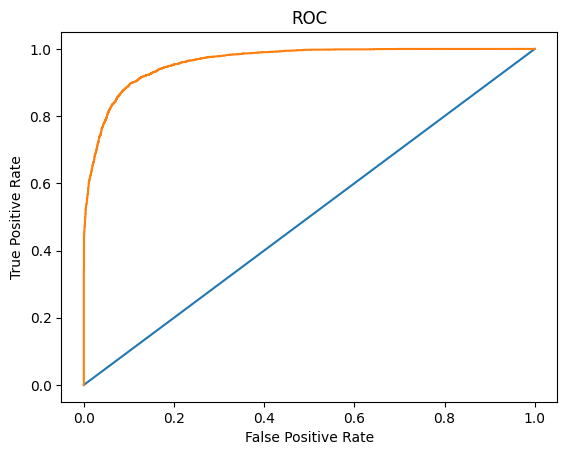

In [62]:
xg_boost = XGBClassifier(random_state = 42)
apply_confusion(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)
apply_curva_roc(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

We chose the "random forest with data balancing" model. It has a better AUC.